In [1]:
import pandas as pd
from hmmlearn import hmm
import numpy as np
from sklearn.decomposition import PCA

from matplotlib import cm, pyplot as plt
import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator

In [2]:
traindir = "/Users/gregruyoga/gmoneycodes/tradingstrats/pca_hmm/data/train_validnopct_returns_train.csv"
validdir = "/Users/gregruyoga/gmoneycodes/tradingstrats/pca_hmm/data/train_validnopct_returns_valid.csv"

train_df = pd.read_csv(traindir)
valid_df = pd.read_csv(validdir)

compl_df = pd.concat([train_df, valid_df], axis=0)
compl_df.set_index('Type', inplace=True)
pd.to_datetime(compl_df.index)

compl_df.drop(["MDKA", "PGEO", "ARTO", "ICBP"], axis=1, inplace=True)

In [3]:
train_df = compl_df[78:]
valid_df = compl_df[:78]

In [4]:
cov_matrix = train_df.cov()
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

total_variance = np.sum(eigenvalues)
cumulative_variance_ratio = np.cumsum(eigenvalues) / total_variance

p = 0.1
k = np.argmax(cumulative_variance_ratio >= (1 - p )) + 1

print("Number of PCA Components", k)

Number of PCA Components 5


In [5]:
train_df.cov()

,ACES,ASII,SMGR,ADRO,BBCA,INCO,MEDC,TLKM,AKRA,BBNI,...,AMRT,BBRI,INKP,UNVR,ANTM,BMRI,ITMG,BRPT,KLBF,PTBA
ACES,1.086650,0.306831,0.150331,-0.242274,0.616914,-0.038978,0.151831,0.739532,0.258743,0.600555,...,0.232659,0.700587,0.699525,0.726315,-0.253982,0.497951,-0.669835,0.681063,0.653954,-0.211314
ASII,0.306831,1.037988,0.458549,-0.040429,0.052894,-0.299388,0.024707,0.417616,0.658206,0.489104,...,0.075834,0.192946,-0.001035,0.589961,-0.494977,0.309900,-0.042473,-0.174108,0.554549,-0.017393
SMGR,0.150331,0.458549,0.859276,-0.435284,-0.205660,-0.368096,-0.110873,-0.178817,0.179420,0.005675,...,-0.129041,-0.116438,-0.269780,0.195700,-0.378145,-0.034414,-0.011657,-0.269177,0.231336,-0.215538
ADRO,-0.242274,-0.040429,-0.435284,0.887978,0.247994,0.658203,0.358986,0.110847,-0.051789,0.229784,...,0.289271,0.185711,0.264268,-0.350708,0.548953,0.211098,0.635095,0.203969,-0.078182,0.708900
BBCA,0.616914,0.052894,-0.205660,0.247994,0.684865,0.393549,0.272862,0.647773,0.209829,0.550833,...,0.433807,0.686068,0.620203,0.271741,0.178968,0.508890,-0.303077,0.682289,0.536870,0.037121
INCO,-0.038978,-0.299388,-0.368096,0.658203,0.393549,0.898762,0.385518,0.100356,-0.207542,0.199683,...,0.327605,0.327980,0.417302,-0.407128,0.779407,0.224197,0.352749,0.406555,0.028467,0.531873
MEDC,0.151831,0.024707,-0.110873,0.358986,0.272862,0.385518,0.517075,0.233818,0.014537,0.365307,...,0.197139,0.293597,0.443605,0.088305,0.196930,0.285484,0.151521,0.249648,0.182066,0.342352
TLKM,0.739532,0.417616,-0.178817,0.110847,0.647773,0.100356,0.233818,1.039751,0.590022,0.740438,...,0.384724,0.726875,0.546031,0.701221,-0.196620,0.610742,-0.595109,0.549134,0.788722,-0.199851
AKRA,0.258743,0.658206,0.179420,-0.051789,0.209829,-0.207542,0.014537,0.590022,0.813343,0.471278,...,0.244708,0.301382,0.016903,0.558806,-0.419408,0.360128,-0.319489,-0.040129,0.673973,-0.345606
BBNI,0.600555,0.489104,0.005675,0.229784,0.550833,0.199683,0.365307,0.740438,0.471278,0.760567,...,0.366558,0.638762,0.556838,0.541676,-0.127823,0.582420,-0.230327,0.423190,0.668650,0.106197


In [6]:
pca = PCA(n_components=k)
train_norm = (train_df - train_df.mean()) / train_df.std()
reduced_data = pca.fit_transform(train_norm)


In [7]:
def train_hmm(factor_returns, max_states=8):
    """
    Train HMM models with different numbers of states and select
    :param factor_returns: 
    :param max_states: 
    :return: 
    """
    best_model_aic = None
    best_aic = np.inf
    best_model_bic = None
    best_bic = np.inf

    for n_states in range(2, max_states + 1):
        model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000)

        try:
            model.fit(factor_returns)
            # Calculate log likelihood
            log_likelihood = model.score(factor_returns)
            # Number of parameters:
            # Transition matrix: (n_states * (n_states - 1))
            # Emission probabilities: (n_states * factor_returns.shape[1] * 2)
            n_params = n_states * (n_states - 1) + 2 * n_states * factor_returns.shape[1]

            # Calculate AIC
            aic = -2 * log_likelihood + 2 * n_params

            # Calculate BIC
            bic = -2 * log_likelihood + n_params * np.log(factor_returns.shape[0])

            # Select the model with the best AIC
            if aic < best_aic:
                best_aic = aic
                best_model_aic = model

            # Select the model with the best BIC
            if bic < best_bic:
                best_bic = bic
                best_model_bic = model

        except Exception as e:
            print(f"Model with {n_states} states failed to converge: {e}")
            continue

    return best_model_aic, best_model_bic, best_aic, best_bic


In [10]:
best_model_aic, best_model_bic, best_aic, best_bic = train_hmm(reduced_data)

In [27]:
pd.to_datetime(train_df.index)

DatetimeIndex(['2023-02-05', '2023-01-29', '2023-01-22', '2023-01-15',
               '2023-01-08', '2023-01-01', '2022-12-25', '2022-12-18',
               '2022-12-11', '2022-12-04',
               ...
               '2009-09-06', '2009-08-30', '2009-08-23', '2009-08-16',
               '2009-08-09', '2009-08-02', '2009-07-26', '2009-07-19',
               '2009-07-12', '2009-07-05'],
              dtype='datetime64[ns]', name='Type', length=710, freq=None)

Transition matrix
[[9.85679955e-001 1.43200447e-002 0.00000000e+000 1.18125366e-058
  0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [5.49980605e-049 9.89504522e-001 0.00000000e+000 1.81302465e-130
  0.00000000e+000 1.04954782e-002 0.00000000e+000]
 [9.21400882e-252 4.16284673e-310 9.93233603e-001 0.00000000e+000
  6.76639718e-003 2.02112882e-115 0.00000000e+000]
 [1.53541986e-002 1.42868425e-263 0.00000000e+000 9.84645801e-001
  0.00000000e+000 0.00000000e+000 2.92526142e-112]
 [0.00000000e+000 0.00000000e+000 2.78875090e-103 0.00000000e+000
  1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [7.21621345e-183 1.48387320e-079 8.77903054e-003 0.00000000e+000
  0.00000000e+000 9.91220969e-001 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 2.03353974e-002
  0.00000000e+000 0.00000000e+000 9.79664603e-001]]

Means and vars of each hidden state
0th hidden state
mean =  [-2.28181745 -0.78545371  2.54513524 -0.63124913  0.62578595]
var =  [1.60869983 0.07365571 1.269805

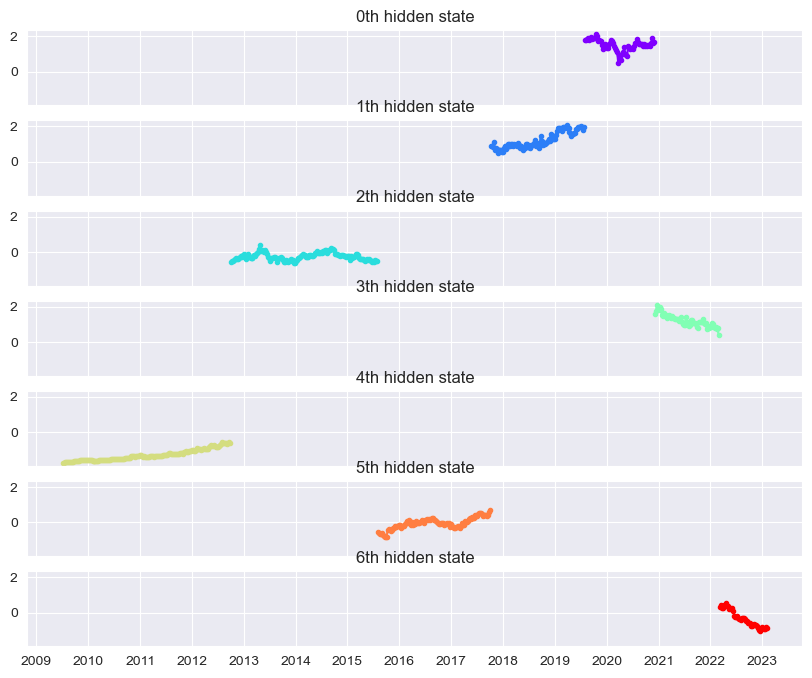

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.dates import YearLocator, MonthLocator

# Ensure dates are in datetime format
dates = pd.to_datetime(train_df.index)

# Assuming best_model_aic is your trained model and reduced_data is the PCA-transformed data
hidden_states = best_model_aic.predict(reduced_data)

print("Transition matrix")
print(best_model_aic.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(best_model_aic.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", best_model_aic.means_[i])
    print("var = ", np.diag(best_model_aic.covars_[i]))
    print()

# Create subplots for each hidden state
fig, axs = plt.subplots(best_model_aic.n_components, sharex=True, sharey=True, figsize=(10, 8))
colours = cm.rainbow(np.linspace(0, 1, best_model_aic.n_components))

for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot(dates[mask], train_df.iloc[mask, 0], ".-", c=colour)  # Assuming first stock for visualization
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()


Predicted hidden states for the validation data:
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6]
Predicted returns based on hidden states:
[[-4.73404127  4.53723755 -1.1951389   2.18196321 -0.68743313]
 [-4.73404127  4.53723755 -1.1951389   2.18196321 -0.68743313]
 [-4.73404127  4.53723755 -1.1951389   2.18196321 -0.68743313]
 [-4.73404127  4.53723755 -1.1951389   2.18196321 -0.68743313]
 [-4.73404127  4.53723755 -1.1951389   2.18196321 -0.68743313]
 [-4.73404127  4.53723755 -1.1951389   2.18196321 -0.68743313]
 [-4.73404127  4.53723755 -1.1951389   2.18196321 -0.68743313]
 [-4.73404127  4.53723755 -1.1951389   2.18196321 -0.68743313]
 [-4.73404127  4.53723755 -1.1951389   2.18196321 -0.68743313]
 [-4.73404127  4.53723755 -1.1951389   2.18196321 -0.68743313]
 [-4.73404127  4.53723755 -1.1951389   2.18196321 -0.68743313]
 [-4.73404127  4.53723755 -1.1951389   2.18196321 -0.687

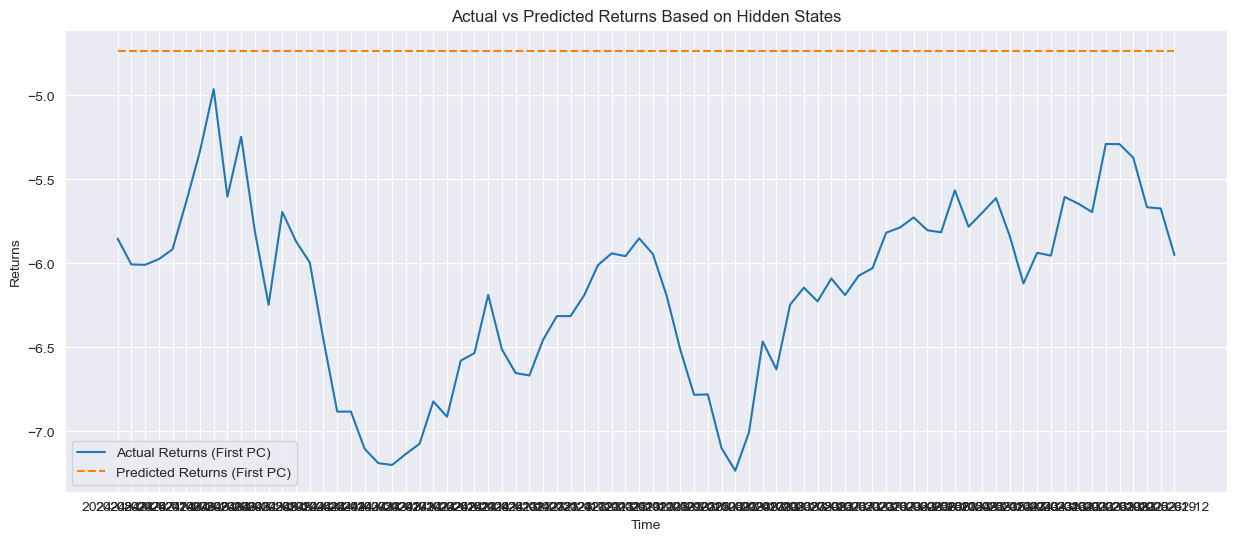

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from hmmlearn import hmm

# Standardize the validation data using the mean and std from the training data
valid_norm = (valid_df - train_df.mean()) / train_df.std()

# Transform the validation data using the PCA model
reduced_valid_data = pca.transform(valid_norm)

# Use the best HMM model (selected by AIC) to predict the hidden states for the validation data
hidden_states_valid = best_model_aic.predict(reduced_valid_data)

# Generate predictions based on the hidden states
predicted_returns = np.array([best_model_aic.means_[state] for state in hidden_states_valid])

# Print predicted hidden states and predicted returns
print("Predicted hidden states for the validation data:")
print(hidden_states_valid)

print("Predicted returns based on hidden states:")
print(predicted_returns)

# Plot actual returns vs predicted returns for the first principal component
plt.figure(figsize=(15, 6))

# Plot actual returns for the first principal component
plt.plot(valid_df.index, reduced_valid_data[:, 0], label='Actual Returns (First PC)')

# Plot predicted returns for the first principal component
plt.plot(valid_df.index, predicted_returns[:, 0], label='Predicted Returns (First PC)', linestyle='--')

plt.title('Actual vs Predicted Returns Based on Hidden States')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()
